<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Moving_Average_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('us_airline_carrier_passenger.csv')

In [5]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [6]:
df.dtypes

month         object
passengers     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [8]:
df['month'] = pd.to_datetime(df['month'])

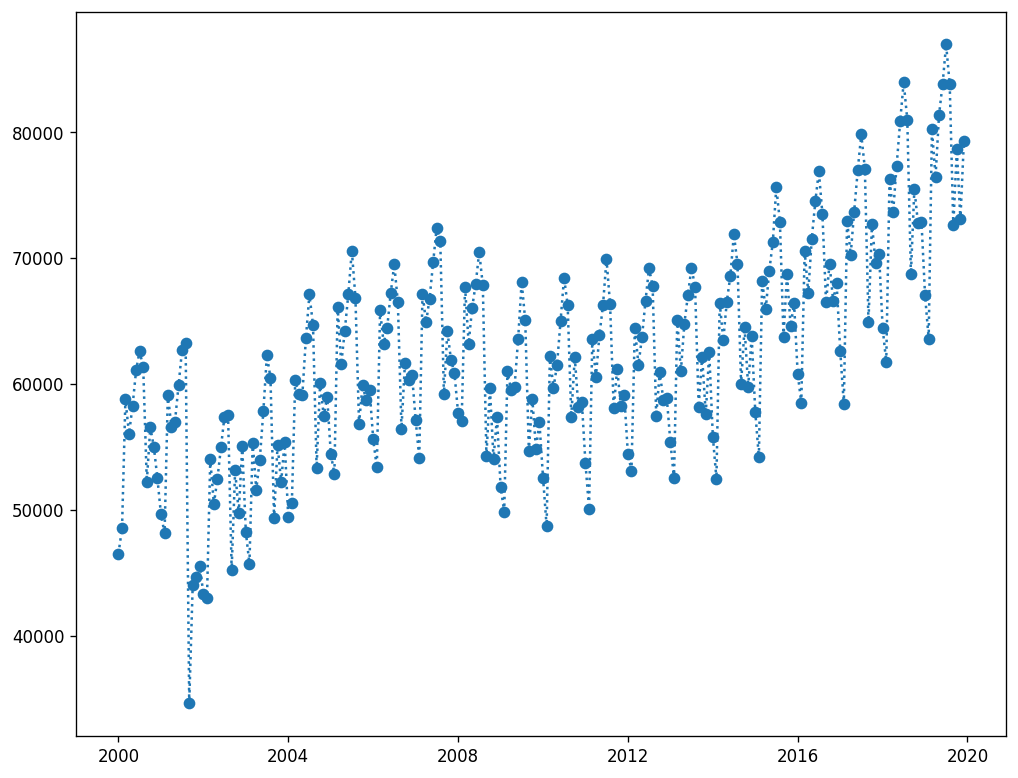

In [9]:
plt.figure(figsize=(10,8),dpi=120)
plt.plot(df['month'],df['passengers'],'o:')

Split data into training and test set
* Training: up until 2016-12-01
* Test: from 2017-01-01 until 2019-12-01

In [10]:
import datetime
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01','%Y-%m-%d')] 

In [11]:
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01','%Y-%m-%d')] 

In [12]:
df_train.tail()

,month,passengers
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [13]:
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


## SMA(3)

In [14]:
df_train_sma = df_train.copy()
df_test_sma = df_test.copy()

In [15]:
df_train_sma['Fitted_3'] = df_train_sma.rolling(window=3).mean()

In [16]:
df_train_sma['Fitted_3'].tail()

199    74946.000000
200    72271.000000
201    69822.000000
202    67535.666667
203    68037.666667
Name: Fitted_3, dtype: float64

In [17]:
df_test_sma['forecast'] = 68037.666667

In [18]:
# Margin of error 
error = df_train_sma['passengers'] - df_train_sma['Fitted_3']
ME = 1.96*error.std() # 95% Confidence interval


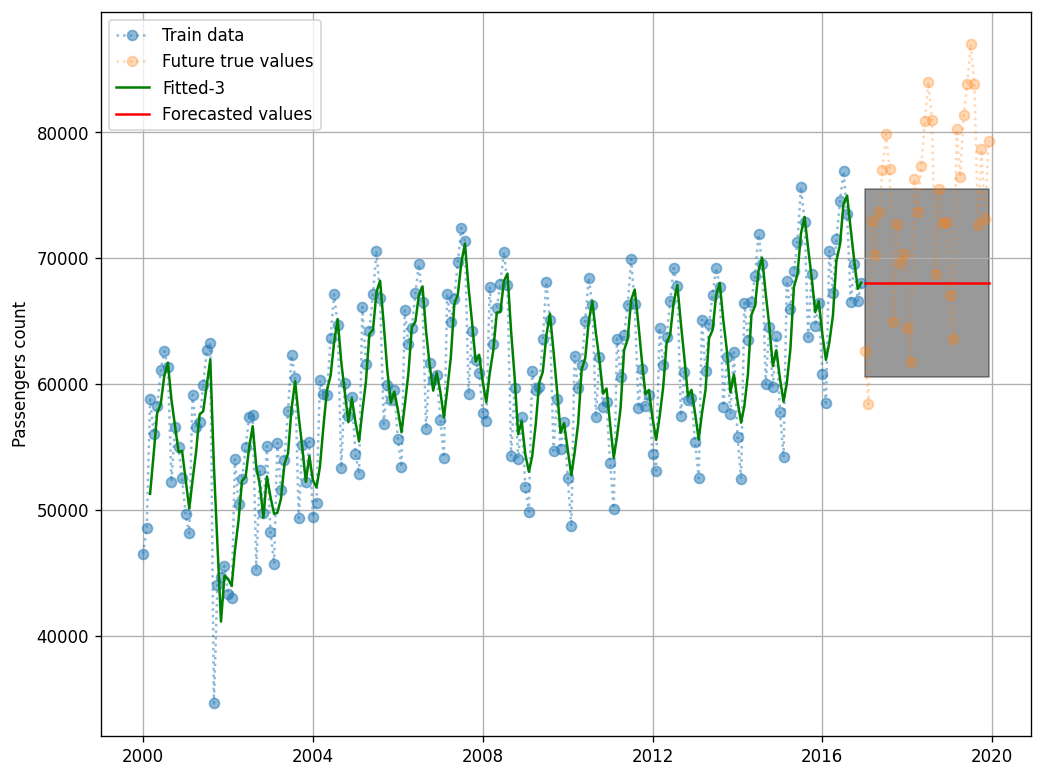

In [19]:

# Visualize the data
plt.figure(figsize =(10,8),dpi=120)
# Training and testing data
plt.plot(df_train_sma['month'],df_train_sma['passengers'],'o:',alpha = 0.5)
plt.plot(df_test_sma['month'],df_test_sma['passengers'],'o:',alpha = 0.3)
#Fitted data
plt.plot(df_train_sma['month'], df_train_sma['Fitted_3'],'g')
# Forecasted data
plt.plot(df_test_sma['month'], df_test_sma['forecast'],'r')
# 95% Confidence interval
plt.fill_between( df_test_sma['month'],df_test_sma['forecast']-ME,df_test_sma['forecast']+ME , alpha=0.4, color='black')

plt.legend(['Train data','Future true values','Fitted-3','Forecasted values'])
plt.grid()

plt.ylabel('Passengers count')
plt.show()



## Weighted Moving Average

In [20]:
df_train_wma = df_train.copy()
df_test_wma = df_test.copy()

In [21]:
df_train_wma.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


Build a WMA(3) with lags = 3

In [22]:
(3*58764+2*48526+1*46492)/(3+2+1)

53306.0

In [23]:
def weighted_moving_average(x):
  # x should be a numpy array
  #generate the weights
  weights = np.arange(1,len(x)+1,+1)
  num = np.sum(x*weights)
  den = np.sum(weights)
  wma = num/den
  return wma

In [24]:
weighted_moving_average([46492,48526,58764])

53306.0

In [25]:
sample = df_train_wma.head()
sample
    

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [26]:
sample['passengers'].rolling(window=3).apply(weighted_moving_average)

0             NaN
1             NaN
2    53306.000000
3    55692.166667
4    57572.166667
Name: passengers, dtype: float64

Choose the number of lags

In [27]:
!pip3 install --upgrade statsmodels

     |████████████████████████████████| 9.5 MB 6.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [28]:
import statsmodels

In [29]:
statsmodels.__version__

'0.10.2'

Apply to the entire data

In [30]:
df_train_wma['Fitted_values_3']= df_train_wma['passengers'].rolling(window=3).apply(weighted_moving_average)
df_train_wma['Fitted_values_62']= df_train_wma['passengers'].rolling(window=62).apply(weighted_moving_average)

In [31]:
df_train_wma.tail()

,month,passengers,Fitted_values_3,Fitted_values_62
199,2016-08-01,73450,74770.666667,65520.943164
200,2016-09-01,66477,70536.166667,65600.055300
201,2016-10-01,69539,69170.166667,65778.132104
202,2016-11-01,66591,67554.666667,65860.962622
203,2016-12-01,67983,67778.333333,65983.619560


In [32]:
df_test_wma['forecast_3'] = 67778.333333 	
df_test_wma['forecast_62'] = 65983.619560 	

In [33]:
# Margin of error 
error = df_train_wma['passengers'] - df_train_wma['Fitted_values_62']
ME = 1.96*error.std() # 95% Confidence interval

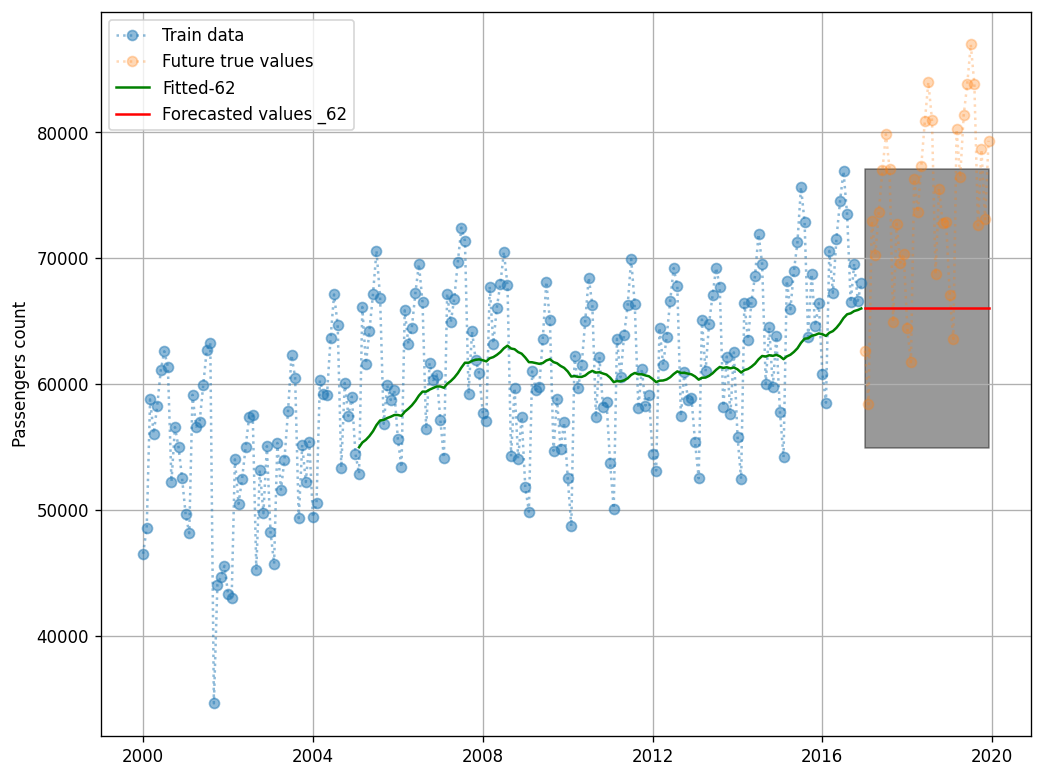

In [34]:
# Choose 62 lags
# Visualize the data
plt.figure(figsize =(10,8),dpi=120)
# Training and testing data
plt.plot(df_train_wma['month'],df_train_wma['passengers'],'o:',alpha = 0.5)
plt.plot(df_test_wma['month'],df_test_wma['passengers'],'o:',alpha = 0.3)
#Fitted data
plt.plot(df_train_wma['month'], df_train_wma['Fitted_values_62'],'g')
plt.fill_between(df_test_wma['month'],df_test_wma['forecast_62']-ME, df_test_wma['forecast_62']+ME,alpha=0.4,color='black')
# Forecasted data
plt.plot(df_test_wma['month'], df_test_wma['forecast_62'],'r')

plt.legend(['Train data','Future true values','Fitted-62','Forecasted values _62'])
plt.grid()

plt.ylabel('Passengers count')
plt.show()


## Exponential Moving Average



In [46]:
df_train_ema = df_train.copy()
df_test_ema = df_test.copy()

EMA

In [50]:
#Fitted values
df_train_ema['Fittedvalues_3'] = df_train_ema['passengers'].ewm(min_periods = 3, alpha = 0.5).mean()

In [55]:
df_train_ema.head()

,month,passengers,Fittedvalues_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,54085.714286
3,2000-04-01,56033,55124.266667
4,2000-05-01,58201,56712.258065


In [56]:
df_train_ema.tail()

,month,passengers,Fittedvalues_3
199,2016-08-01,73450,73886.632073
200,2016-09-01,66477,70181.816036
201,2016-10-01,69539,69860.408018
202,2016-11-01,66591,68225.704009
203,2016-12-01,67983,68104.352005


In [57]:
# Forecasted values
df_test_ema['Forecasted_values'] = 68104.352005

In [58]:
# Margin of error
error = df_train_ema['passengers'] - df_train_ema['Fittedvalues_3']
se = error.std()
ME = 1.96*se #(95% CI)

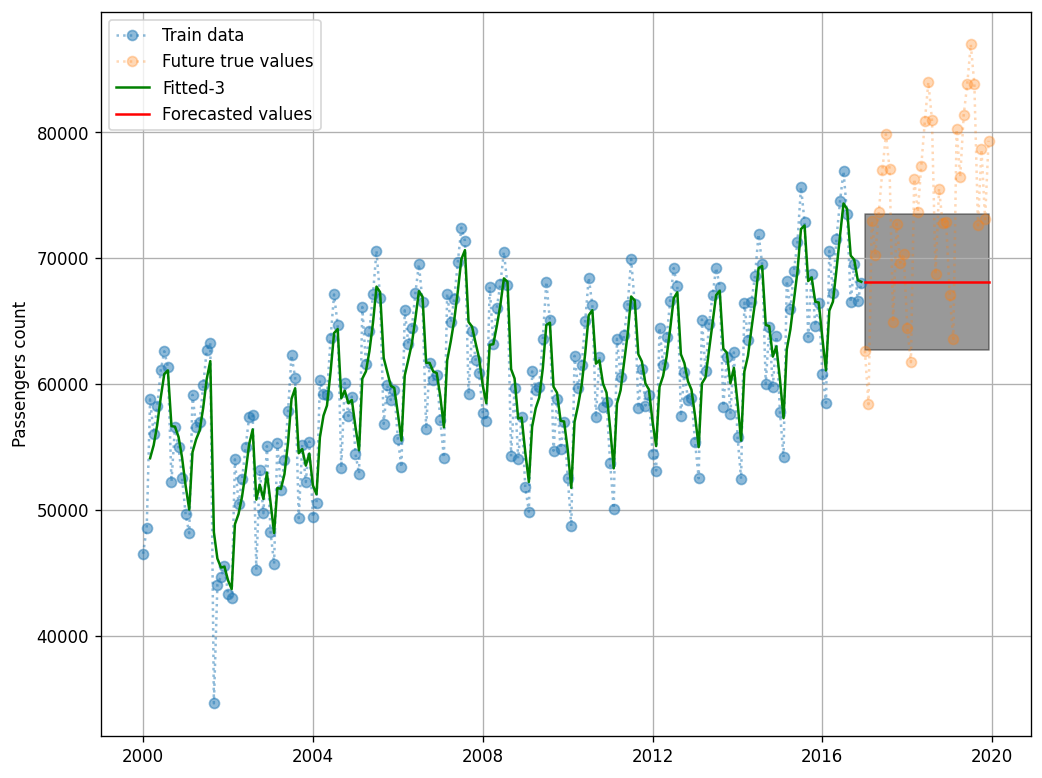

In [60]:
# Visualize the data
plt.figure(figsize =(10,8),dpi=120)
# Training and testing data
plt.plot(df_train_ema['month'],df_train_ema['passengers'],'o:',alpha = 0.5)
plt.plot(df_test_ema['month'],df_test_ema['passengers'],'o:',alpha = 0.3)
#Fitted data
plt.plot(df_train_ema['month'], df_train_ema['Fittedvalues_3'],'g')
plt.fill_between(df_test_ema['month'],df_test_ema['Forecasted_values']-ME, df_test_ema['Forecasted_values']+ME,alpha=0.4,color='black')
# Forecasted data
plt.plot(df_test_ema['month'], df_test_ema['Forecasted_values'],'r')

plt.legend(['Train data','Future true values','Fitted-3','Forecasted values'])
plt.grid()

plt.ylabel('Passengers count')
plt.show()